number of faces in image( 1 ) :  1
(48, 48)
pixel values [[237 188 134 ..., 225 223 220]
 [230 181 149 ..., 225 226 223]
 [218 133  96 ..., 229 225 225]
 ..., 
 [222 224 223 ..., 215 215 212]
 [220 224 221 ..., 212 214 214]
 [221 222 222 ..., 214 213 212]]


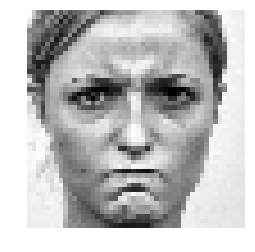

In [50]:
import cv2
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image

number = 0

def format_image(image):
    global number
    number += 1
    if len(image.shape) > 2 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        image = clahe.apply(image)
    else:
        image = cv2.imdecode(image, cv2.CV_LOAD_IMAGE_GRAYSCALE)
    faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml').detectMultiScale(
        image,
        scaleFactor=1.3,
        minNeighbors=5
    )
    
    print("number of faces in image(",number,") : ",len(faces))
    if not len(faces) > 0:
        return None
    max_area_face = faces[0]
    for face in faces:
        if face[2] * face[3] > max_area_face[2] * max_area_face[3]:
            max_area_face = face
    # Chop image to face
    face = max_area_face
    image = image[face[1]:(face[1] + face[2]), face[0]:(face[0] + face[3])]
    # Resize image to network size
    try:
        image = cv2.resize(image, (48, 48), interpolation=cv2.INTER_CUBIC)
        plt.figure()
        plt.axis('off')
        plt.imshow(image, cmap = 'gray')
        return image
    except Exception:
        print("[+] Problem during resize")
        return None

filename = "../RafD/front/Rafd090_01_Caucasian_female_angry_frontal.jpg"
frame = cv2.imread(filename)
resultImage = format_image(frame)
print("pixel values",resultImage)